## Exploratory Data Analysis (EDA)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
print('Libraries Imported')
sns.set()

Libraries Imported


In [4]:
data= pd.read_csv('movies.csv')

In [3]:
data.shape

(45376, 20)

In [15]:
data.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
0,Toy Story Collection,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995,12.451801
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035
2,Grumpy Old Men Collection,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000


In [5]:
#Verifica el tipo de dato
display(data.dtypes)

belongs_to_collection     object
budget                     int64
genres                    object
id                         int64
original_language         object
overview                  object
popularity               float64
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
vote_average             float64
vote_count               float64
release_year               int64
return                   float64
dtype: object

In [6]:
#Verifica si hay nulos
data.isnull().sum()

belongs_to_collection    40888
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24978
title                        0
vote_average                 0
vote_count                   0
release_year                 0
return                       0
dtype: int64

In [7]:
#Verifica si hay datos duplicados
print(f'records duplicated: {data.duplicated().sum()}')

records duplicated: 17


In [8]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.537600e+04,45376.000000,45376.000000,4.537600e+04,45130.000000,45376.000000,45376.000000,45376.000000,4.537600e+04
mean,4.232604e+06,108027.103094,2.926458,1.123010e+07,94.181675,5.624070,110.096439,1991.881193,6.600428e+02
std,1.743986e+07,112168.377996,6.009672,6.438996e+07,38.341059,1.915423,491.742894,24.055360,7.469329e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26385.750000,0.388840,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59857.500000,1.130454,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156533.500000,3.691695,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


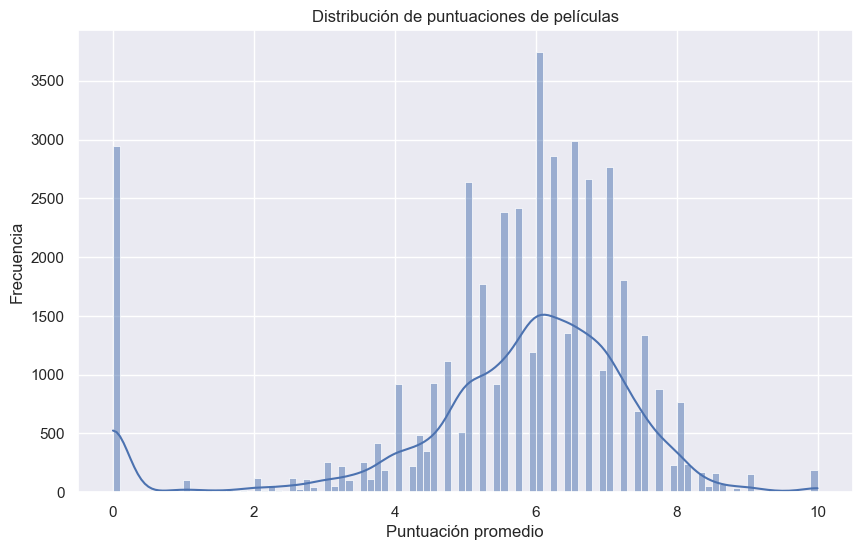

In [9]:
# Analiza la distribución de las puntuaciones de las películas
plt.figure(figsize=(10, 6))
sns.histplot(data['vote_average'], kde=True)
plt.xlabel('Puntuación promedio')
plt.ylabel('Frecuencia')
plt.title('Distribución de puntuaciones de películas')
plt.show()


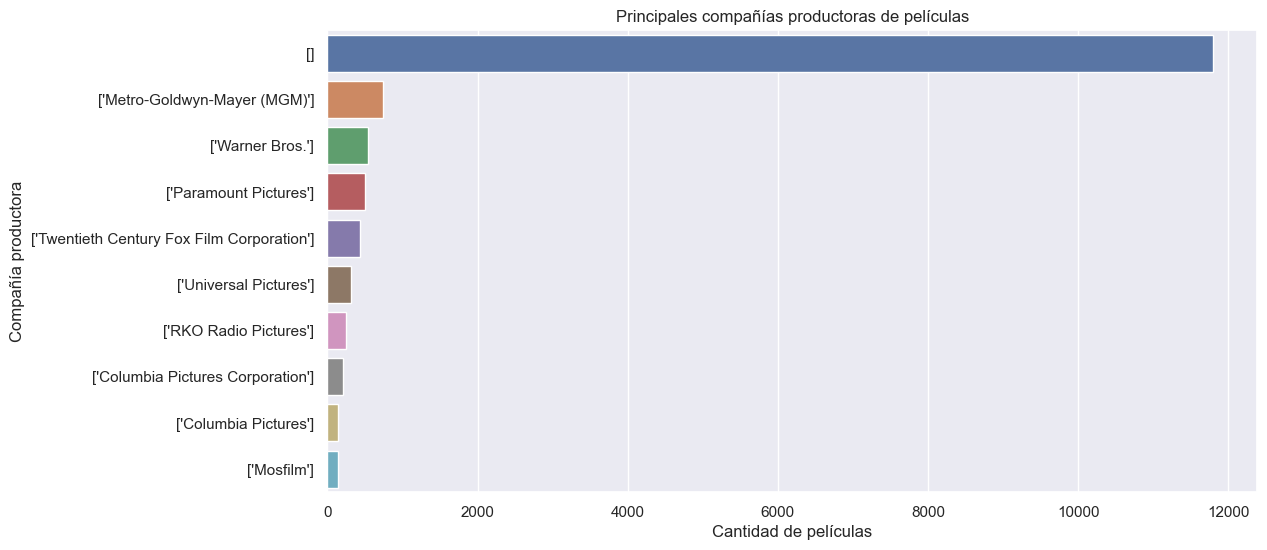

In [10]:
# Investiga las principales compañías productoras de películas
plt.figure(figsize=(12, 6))
top_companies = data['production_companies'].value_counts().head(10)
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.xlabel('Cantidad de películas')
plt.ylabel('Compañía productora')
plt.title('Principales compañías productoras de películas')
plt.show()

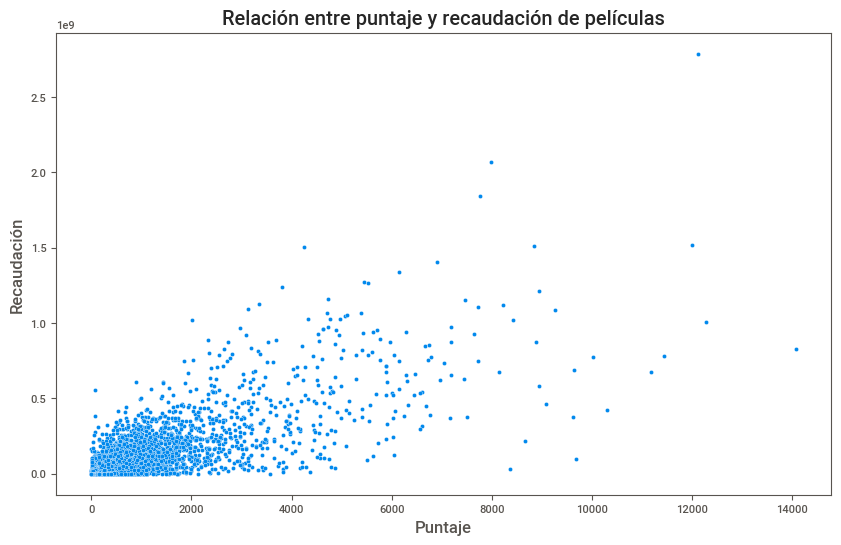

In [27]:
# Explora la relación entre el presupuesto y la recaudación de las películas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_count', y='revenue', data=data)
plt.xlabel('Puntaje')
plt.ylabel('Recaudación')
plt.title('Relación entre puntaje y recaudación de películas')
plt.show()

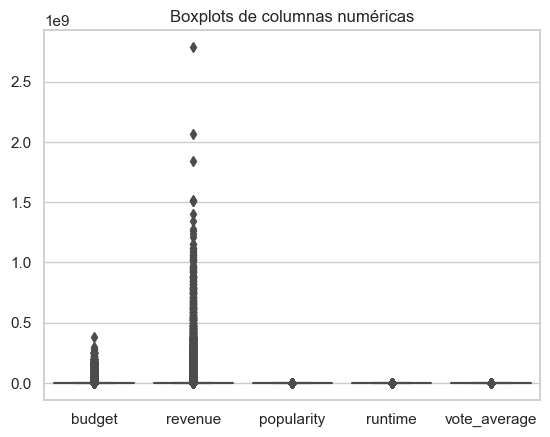

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo de gráficos de seaborn
sns.set(style='whitegrid')

# Generar los boxplots de las columnas numéricas
sns.boxplot(data=data[['budget', 'revenue', 'popularity', 'runtime', 'vote_average']])

# Agregar un título al gráfico
plt.title('Boxplots de columnas numéricas')

# Mostrar el gráfico
plt.show()

##### Si bien hay outliers en revenue no generan problemas 

C:\Users\maria\AppData\Local\Temp\ipykernel_5224\4160301745.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


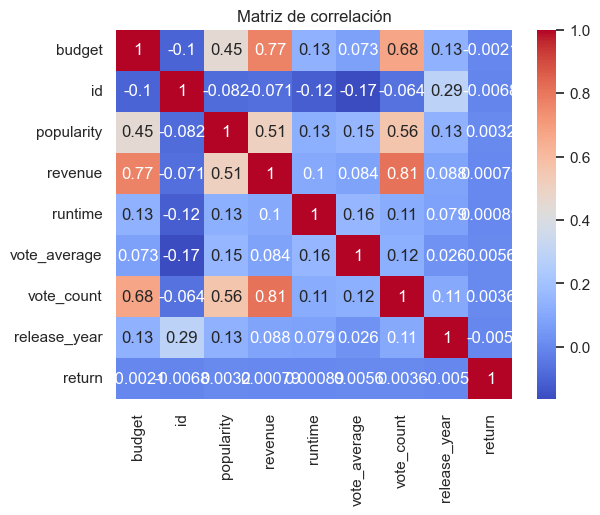

In [15]:
import seaborn as sns

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


##### Se verifica alta correlacion entre return y budget 
##### Tambien entre revenue y vote_count lo que indicaria q si el presupuesto aumenta, las votaciones tambien

### Nube de palabras

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtener los títulos como una cadena
titles = ' '.join(data['title'].dropna())

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Títulos')
plt.show()


C:\Users\maria\AppData\Local\Temp\ipykernel_848\4128019535.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [9]:
# Guardar la nube de palabras como una imagen
wordcloud.to_file("wordcloud.png")


## Modelo de recomendacion 

In [2]:
import pandas as pd
df= pd.read_csv('movies.csv')


# Seleccionamos las columnas que queremos
df = df[['title', 'vote_average']]

# Guardamos el nuevo dataset en un archivo CSV
df.to_csv('moviesml.csv', index=False)

In [3]:
df= pd.read_csv('moviesml.csv')
df.head(1)

,title,vote_average
0,Toy Story,7.7


In [33]:
# Limpia los titulos de caracteres especiales
import re
def clean_title (title):
    return re.sub("[^a-zA-Z0-9]"," ",title)

In [34]:
df["clean_title"]=df["title"].apply(clean_title)

In [35]:
df.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,clean_title
0,Toy Story Collection,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,Toy Story
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035,Jumanji
2,Grumpy Old Men Collection,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000,Grumpier Old Men
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760,Waiting to Exhale
4,Father of the Bride Collection,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,0.000000,Father of the Bride Part II


In [37]:
#Empiezo a transformar el titulo en vectores
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2))

tfidf = vectorizer.fit_transform(df["clean_title"])

In [19]:
from sklearn.decomposition import PCA


In [20]:
import numpy as np

X = np.array(df['vote_average'])
# Reshape de X a una matriz bidimensional con forma (5, 1)
X_reshaped = X.reshape(-1, 1)

# Imprimir la forma de la matriz X_reshaped
print(X_reshaped.shape)

(45376, 1)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1))


In [27]:
n_components = 1 # Número de componentes principales
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)



In [25]:
print(X_scaled.shape)


(45376, 1)


In [28]:
def recomendacion(titulo):
    titulo = titulo.lower()
    if titulo not in df['title'].str.lower().values:
        print("La película no se encuentra en el DataFrame.")
        return []
    
    idx = df[df['title'].str.lower() == titulo].index[0]
    sim_scores = list(enumerate(X_pca[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices].tolist()


In [30]:
recomendacion('Jumanji')

[]

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Cargar el dataset
df = pd.read_csv('moviesml.csv')

# Calcular la matriz de similitud de coseno entre las puntuaciones de las películas
matriz_puntuaciones = df.pivot_table(index='title', columns='title', values='vote_average', fill_value=0)
matriz_similitud = cosine_similarity(matriz_puntuaciones)

# Función de recomendación
def recomendacion(titulo):
    # Obtener el índice de la película en la matriz de similitud
    indice_pelicula = matriz_puntuaciones.index.get_loc(titulo)
    
    # Obtener las similitudes de la película de referencia con las demás películas
    similitudes = matriz_similitud[indice_pelicula]
    
    # Ordenar las películas según la similitud
    indices_peliculas = similitudes.argsort()[::-1]
    
    # Obtener las 5 películas más similares
    peliculas_recomendadas = matriz_puntuaciones.index[indices_peliculas[1:6]].tolist()
    
    return peliculas_recomendadas


In [32]:
import pandas as pd

def recomendación(título):
    # Cargamos el dataset
    df = pd.read_csv('moviesml.csv')
    
    # Creamos una matriz de correlación entre las puntuaciones de las películas
    corr_matrix = df.corr(method='pearson')
    
    # Obtenemos las correlaciones para la película ingresada
    corr_peli = corr_matrix[título]
    
    # Ordenamos las correlaciones en orden descendente y seleccionamos las 5 películas más similares
    pelis_similares = corr_peli.sort_values(ascending=False)[1:6]
    
    # Devolvemos los títulos de las películas similares
    return pelis_similares.index.tolist()

In [33]:
recomendación("Toy Story")

C:\Users\maria\AppData\Local\Temp\ipykernel_5560\430810938.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')


KeyError: 'Toy Story'

In [37]:
import pandas as pd

def recomendación(título):
    # Cargamos el dataset
    df = pd.read_csv('moviesml.csv')
    
    # Ordenamos las películas por puntuación en orden descendente
    pelis_ordenadas = df.sort_values(by='vote_average', ascending=False)
    
    # Seleccionamos las 5 películas con las puntuaciones más altas
    pelis_similares = pelis_ordenadas.head(5)
    
    # Devolvemos los títulos de las películas similares
    return pelis_similares['title'].tolist()

In [38]:
recomendación("Toy Story")

['Chilly Scenes of Winter',
 'Carmen Miranda: Bananas Is My Business',
 'Lunch Break',
 'The Walking Stick',
 'Fearless Fagan']

In [39]:
import pandas as pd

# Cargamos el dataset
df = pd.read_csv('movies.csv')

# Filtramos las filas donde 'vote_average' es igual a 0
df_filtrado = df.loc[df['popular'] == 0]

# Mostramos el resultado
print(df_filtrado)

                              title  vote_average
83      Last Summer in the Hamptons           0.0
107    Headless Body in Topless Bar           0.0
126                  Jupiter's Wife           0.0
132                   Sonic Outlaws           0.0
137                          Target           0.0
...                             ...           ...
45343                 Altar of Fire           0.0
45345        The Wonders of Aladdin           0.0
45363                   Deep Hearts           0.0
45374              Satan Triumphant           0.0
45375                      Queerama           0.0

[2947 rows x 2 columns]
